### Reading and Understanding data

In [46]:
# Importing libraies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")
from sklearn.metrics import r2_score
%matplotlib inline

In [27]:
#reading the data
inp1 = pd.read_csv("day.csv")

In [28]:
inp1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [29]:
inp1.shape

(730, 16)

In [30]:
#checking the missing value
inp1.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [31]:
inp1.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Cleaning the data

In [32]:
#droping the coloumn 
inp1.drop(['instant','dteday','casual','registered'],axis = 1 ,inplace = True)

In [33]:
inp1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [35]:
#mapping the value of given numbers
inp1.season = inp1.season.map({1:'spring',2:'summer',3:'fall', 4:'winter'})

In [36]:
inp1.mnth = inp1.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [37]:
inp1.weekday = inp1.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [38]:
inp1.weathersit = inp1.weathersit.map({1:'clear',2:'misty',3:'light_snow',4:'heavy_rain'})

In [41]:
inp1.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


### Exploratory Data Analysis

In [42]:
num_var = ['temp','atemp','windspeed','hum','cnt']

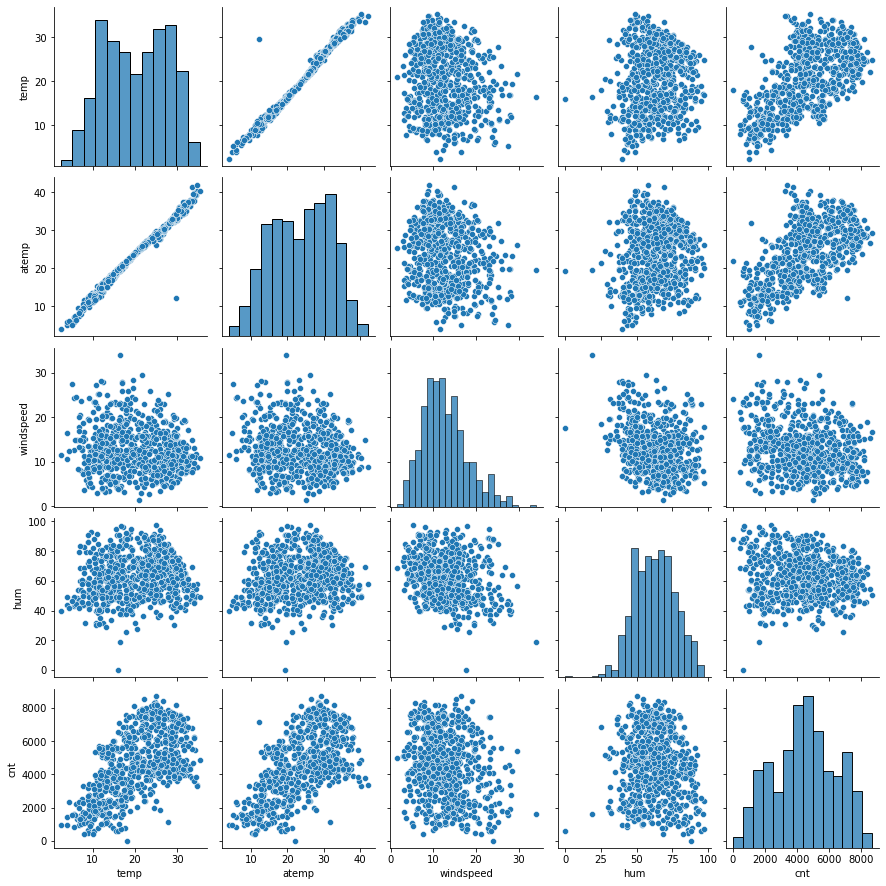

In [47]:
#numerical analysis 
sns.pairplot(inp1[num_var])
plt.show()

In [48]:
#catagorical analysis
inp1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


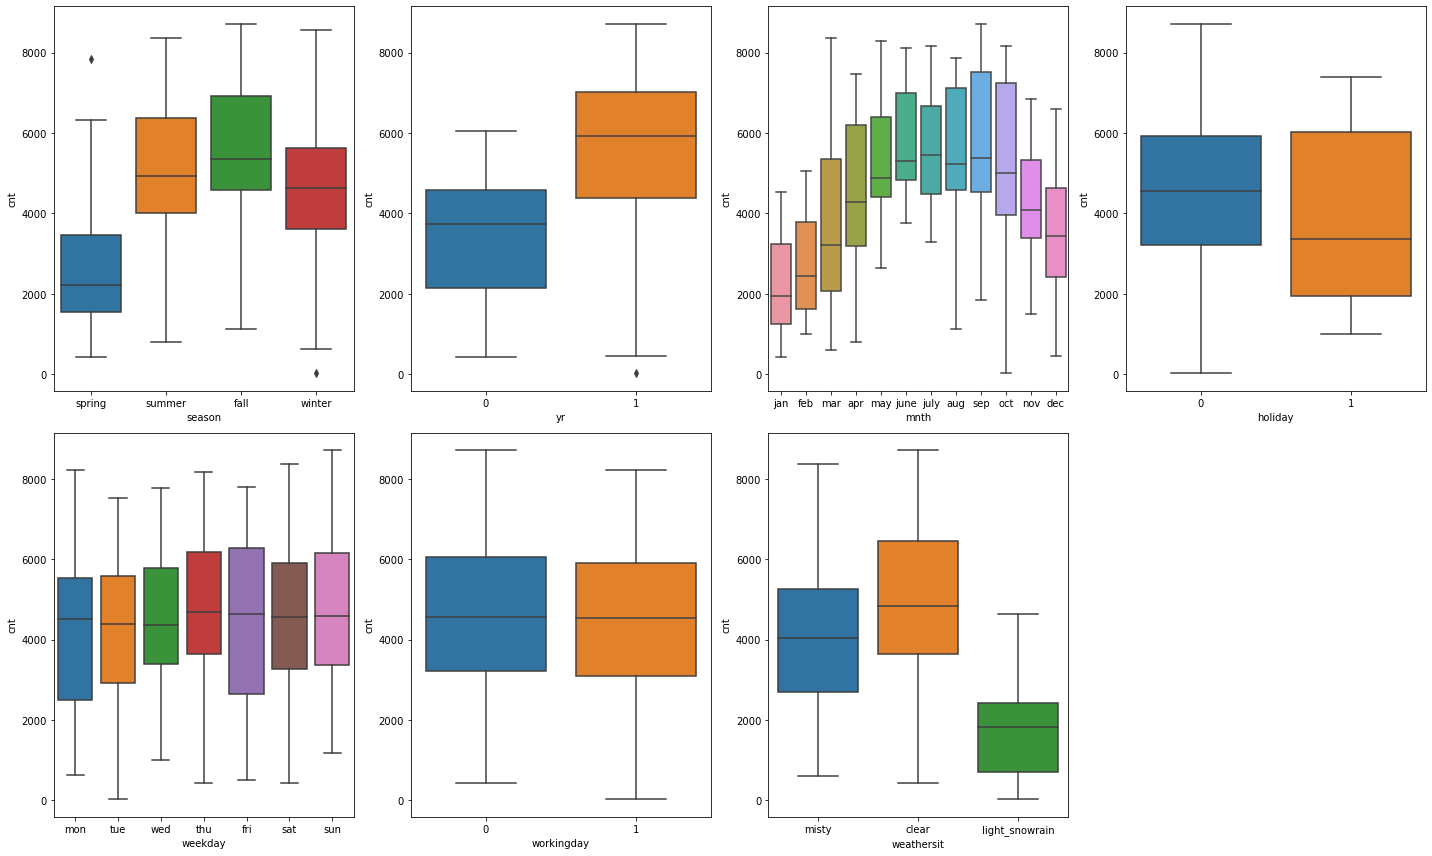

In [49]:
cat_vars=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = inp1)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = inp1)
plt.subplot(2,4,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = inp1)
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = inp1)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = inp1)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = inp1)
plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = inp1)
plt.tight_layout()
plt.show()


### Preparing for data modeling

In [51]:
#creating dummy coloum and droping the first coloumn
season_inp1 = pd.get_dummies(inp1.season,drop_first = True)

In [53]:
mnth_inp1 = pd.get_dummies(inp1.mnth, drop_first = True)
weekday_inp1 = pd.get_dummies(inp1.weekday, drop_first = True)
weathersit_inp1 = pd.get_dummies(inp1.weathersit, drop_first = True)

In [61]:
# concataing the dummie and the inp1 variable
inp2 = pd.concat([inp1,season_inp1,weekday_inp1,weathersit_inp1,mnth_inp1], axis=1)


In [57]:
# checking the heading
inp2.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,summer,winter,mon,sat,sun,thu,tue,wed,light_snowrain,misty
0,spring,0,jan,0,mon,1,misty,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,jan,0,tue,1,misty,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,thu,1,clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [97]:
# droping the head which is of no use
inp2.drop(['season','mnth','weekday','weathersit'],axis= 1 ,inplace = True)

In [98]:
inp2.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,dec,feb,jan,july,june,mar,may,nov,oct,sep
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,1,0,0,0,0,0,0,0


In [101]:
#checking the missing value
inp2.isnull().sum()

yr                0
holiday           0
workingday        0
temp              0
atemp             0
hum               0
windspeed         0
cnt               0
spring            0
summer            0
winter            0
mon               0
sat               0
sun               0
thu               0
tue               0
wed               0
light_snowrain    0
misty             0
aug               0
dec               0
feb               0
jan               0
july              0
june              0
mar               0
may               0
nov               0
oct               0
sep               0
dtype: int64

In [102]:
#checking the shape so we can go further for test and train data set
inp2.shape

(730, 30)

### Making Test and Train variable

In [103]:
import sklearn 
from sklearn.model_selection import train_test_split

### Train test split

In [104]:
# splitting the train and test data 
np.random.seed(0)
inp1_train,inp1_test= train_test_split(inp2,train_size=0.7,random_state=True)

In [105]:
#checking test size
inp1_test.shape

(220, 30)

In [106]:
#checking train size
inp1_train.shape

(510, 30)

### Rescaling the Features

In [107]:
from sklearn.preprocessing import MinMaxScaler

In [108]:
scaler = MinMaxScaler()

In [109]:
inp1_train[num_var]=scaler.fit_transform(inp1_train[num_var])
inp1_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,dec,feb,jan,july,june,mar,may,nov,oct,sep
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.503922,0.031373,0.711765,0.564793,0.557248,0.526474,0.400317,0.525079,0.219608,0.264706,...,0.072549,0.072549,0.082353,0.094118,0.084314,0.070588,0.092157,0.098039,0.080392,0.086275
std,0.500476,0.174494,0.453386,0.226815,0.219147,0.194258,0.190021,0.218870,0.414387,0.441610,...,0.259649,0.259649,0.275172,0.292279,0.278131,0.256387,0.289531,0.297660,0.272166,0.281045
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.372655,0.381278,0.379602,0.264072,0.382737,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.579661,0.585630,0.524942,0.371641,0.527266,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.757395,0.733434,0.668793,0.512950,0.680022,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Trainig the Model

### Checking cofficent and corelation

In [110]:
#checking the correlation
inp1_train.corr()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,dec,feb,jan,july,june,mar,may,nov,oct,sep
yr,1.000000,-0.001412,-0.016654,0.022078,0.020557,-0.141493,0.027251,0.568449,-0.004161,0.008628,...,0.020484,0.020484,-0.016615,0.024333,-0.023551,0.028460,-0.009278,-0.002586,-0.023954,-0.016378
holiday,-0.001412,1.000000,-0.282808,-0.014228,-0.019973,-0.027146,0.000268,-0.054755,0.013212,-0.056990,...,-0.006972,-0.006972,0.027920,0.019034,-0.054610,-0.049597,-0.018452,0.091967,0.029526,0.024822
workingday,-0.016654,-0.282808,1.000000,0.009240,0.022893,0.024336,-0.001330,-0.032012,-0.028418,0.008947,...,-0.005596,-0.005596,-0.045575,0.027210,-0.009440,0.040165,0.008188,-0.023121,0.044861,-0.035734
temp,0.022078,-0.014228,0.009240,1.000000,0.989245,0.112598,-0.161096,0.602716,-0.600186,0.151714,...,-0.271683,-0.315219,-0.437423,0.446686,0.299544,-0.131555,0.163334,-0.250731,-0.034634,0.186346
atemp,0.020557,-0.019973,0.022893,0.989245,1.000000,0.122572,-0.186572,0.607704,-0.605695,0.161282,...,-0.261814,-0.318923,-0.444605,0.443910,0.294600,-0.127388,0.168720,-0.239230,-0.019586,0.179009
hum,-0.141493,-0.027146,0.024336,0.112598,0.122572,1.000000,-0.255652,-0.142142,-0.159538,-0.026244,...,0.079121,-0.135956,-0.071488,-0.051559,-0.105051,-0.076795,0.098974,-0.012104,0.132285,0.176232
windspeed,0.027251,0.000268,-0.001330,-0.161096,-0.186572,-0.255652,1.000000,-0.227240,0.184344,0.095059,...,-0.087276,0.140018,0.048907,-0.102417,-0.035487,0.144522,-0.034107,-0.019067,-0.066162,-0.120475
cnt,0.568449,-0.054755,-0.032012,0.602716,0.607704,-0.142142,-0.227240,1.000000,-0.533840,0.155367,...,-0.149051,-0.265256,-0.385568,0.183701,0.166601,-0.055587,0.136864,-0.073983,0.075856,0.187568
spring,-0.004161,0.013212,-0.028418,-0.600186,-0.605695,-0.159538,0.184344,-0.533840,1.000000,-0.318287,...,0.070747,0.527233,0.564721,-0.170989,-0.160969,0.242134,-0.169015,-0.174893,-0.156846,-0.163005
summer,0.008628,-0.056990,0.008947,0.151714,0.161282,-0.026244,0.095059,0.155367,-0.318287,1.000000,...,-0.167811,-0.167811,-0.179743,-0.193398,0.297797,0.094925,0.531015,-0.197814,-0.177401,-0.184368


<AxesSubplot:>

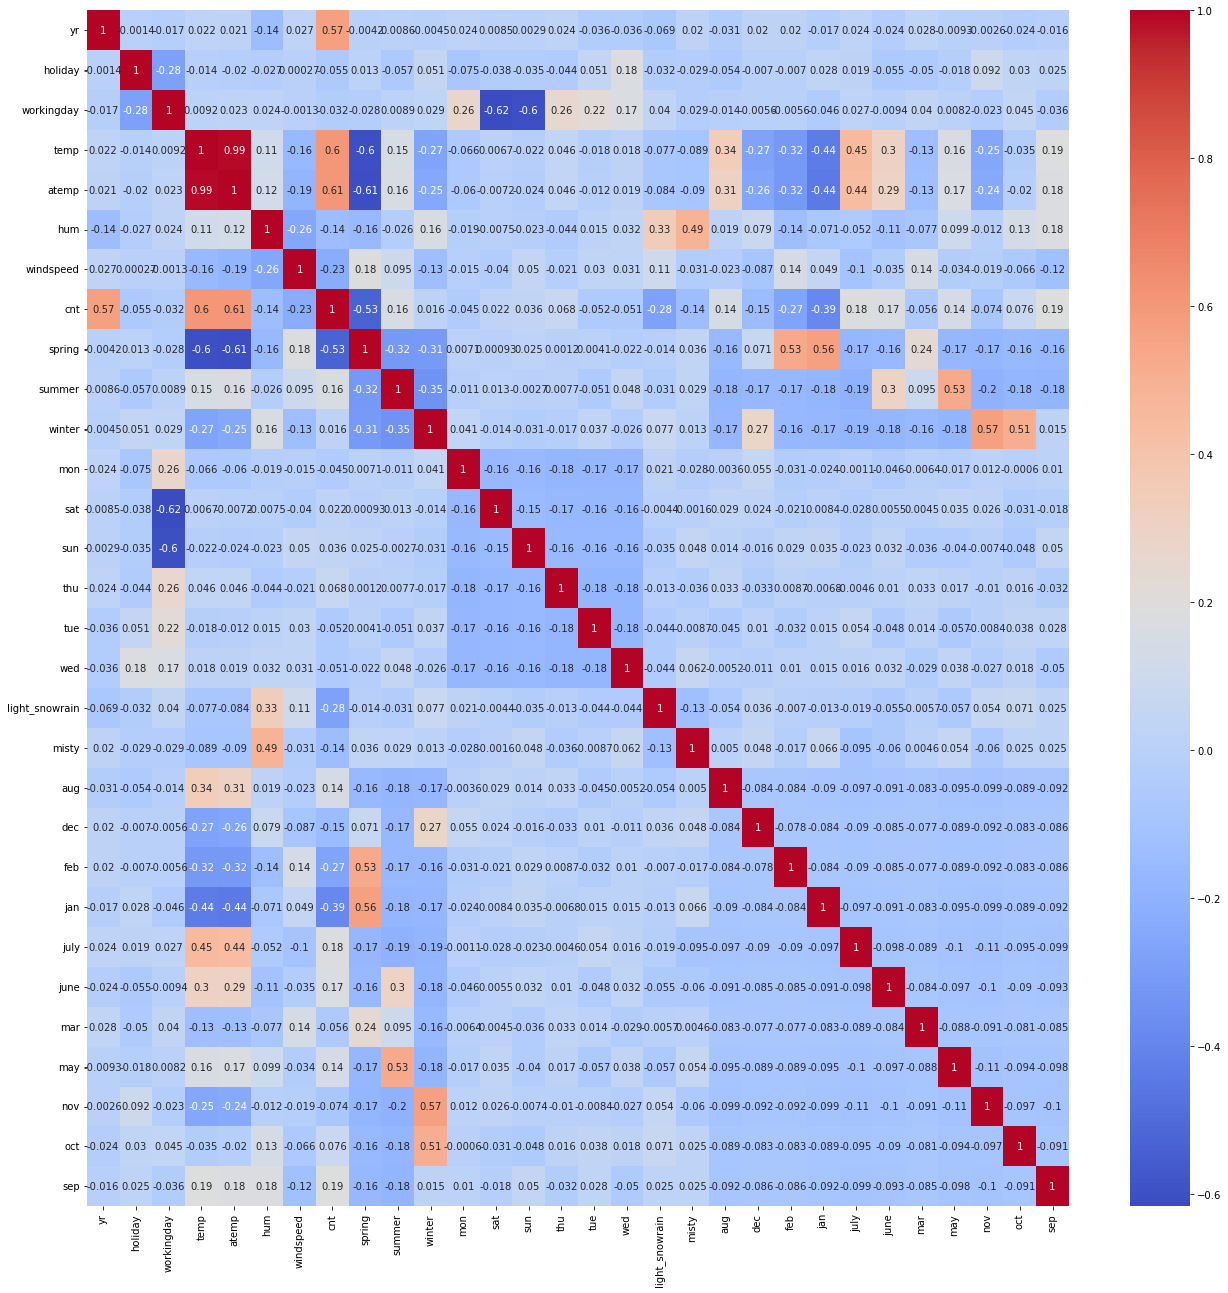

In [111]:
plt.figure(figsize = (22,22))
sns.heatmap(inp1_train.corr(),annot=True,cmap='coolwarm')

### Splitting into X_train and y_train

In [112]:
y_train=inp1_train.pop("cnt")
X_train=inp1_train

### Selecting features using RFE

In [113]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [115]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm,n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [116]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 12),
 ('winter', True, 1),
 ('mon', False, 9),
 ('sat', False, 3),
 ('sun', False, 4),
 ('thu', False, 14),
 ('tue', False, 10),
 ('wed', False, 11),
 ('light_snowrain', True, 1),
 ('misty', True, 1),
 ('aug', False, 13),
 ('dec', False, 6),
 ('feb', False, 8),
 ('jan', False, 5),
 ('july', True, 1),
 ('june', False, 15),
 ('mar', True, 1),
 ('may', True, 1),
 ('nov', False, 7),
 ('oct', True, 1),
 ('sep', True, 1)]

In [117]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'spring',
       'winter', 'light_snowrain', 'misty', 'july', 'mar', 'may', 'oct',
       'sep'],
      dtype='object')

In [118]:
X_train.columns[~rfe.support_]

Index(['workingday', 'summer', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed', 'aug',
       'dec', 'feb', 'jan', 'june', 'nov'],
      dtype='object')

In [119]:
X_train_rfe = X_train[col]

# Data Modeling

In [121]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

### model 1

In [123]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,atemp,369.79
2,temp,368.43
4,hum,15.59
5,windspeed,4.99
7,winter,2.60
9,misty,2.48
6,spring,2.26
0,yr,2.03
10,july,1.58
13,oct,1.54


In [124]:
X_train_lm1 = sm.add_constant(X_train_rfe)
lr1 = sm.OLS(y_train,X_train_lm1).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     159.7
Date:                Tue, 15 Nov 2022   Prob (F-statistic):          2.07e-178
Time:                        01:09:59   Log-Likelihood:                 502.10
No. Observations:                 510   AIC:                            -972.2
Df Residuals:                     494   BIC:                            -904.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3206      0.029     11.

### Model 2

In [126]:
X_train_rfe = X_train_rfe.drop(["hum"], axis = 1)

In [127]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,368.35
3,atemp,363.83
4,windspeed,4.94
6,winter,2.01
0,yr,2.00
5,spring,1.75
9,july,1.56
12,oct,1.53
8,misty,1.49
11,may,1.32


In [128]:
X_train_lm2 = sm.add_constant(X_train_rfe)
lr2 = sm.OLS(y_train,X_train_lm2).fit()
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     160.9
Date:                Tue, 15 Nov 2022   Prob (F-statistic):          6.51e-174
Time:                        01:10:40   Log-Likelihood:                 488.69
No. Observations:                 510   AIC:                            -947.4
Df Residuals:                     495   BIC:                            -883.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2608      0.027      9.

### Residual Analysis

In [145]:
y_train_pred=lr2.predict(X_train_lm2)
res=y_train-y_train_pred

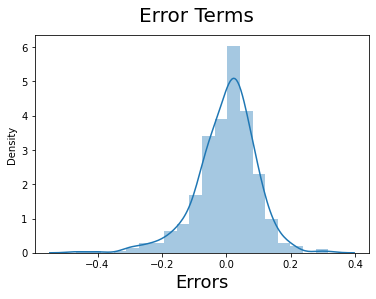

In [146]:
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                
plt.xlabel('Errors', fontsize = 18)      
plt.show()

# Prediction on Test Set

In [132]:
inp1_test[num_var]=scaler.transform(inp1_test[num_var])
inp1_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,dec,feb,jan,july,june,mar,may,nov,oct,sep
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.490909,0.022727,0.640909,0.523860,0.517582,0.504768,0.402761,0.495310,0.309091,0.222727,...,0.113636,0.086364,0.090909,0.063636,0.077273,0.118182,0.068182,0.045455,0.095455,0.072727
std,0.501057,0.149373,0.480828,0.240908,0.235474,0.206717,0.173235,0.230612,0.463173,0.417026,...,0.318093,0.281541,0.288135,0.244661,0.267633,0.323559,0.252632,0.208774,0.294512,0.260281
min,0.000000,0.000000,0.000000,0.048429,0.051165,-0.353829,0.057872,0.069144,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.303531,0.304904,0.350493,0.285446,0.318540,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.514263,0.521185,0.510441,0.387208,0.479579,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.747111,0.720594,0.648637,0.488116,0.686925,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.015822,1.050480,0.968097,1.157215,0.937069,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Splitting into X_test and y_test


In [135]:
y_test = inp1_test.pop('cnt')
X_test = inp1_test


### Making prediction

In [137]:
X_test_new = X_test[X_train_rfe.columns]
X_test_new = sm.add_constant(X_test_new)
y_test_pred = lr2.predict(X_test_new)

# Model evaluation

### Plotting Actual Vs. Predicted

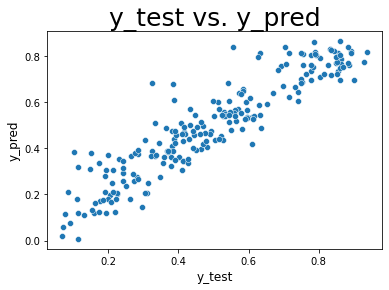

In [140]:
sns.scatterplot(y_test, y_test_pred)
plt.title("y_test vs. y_pred",fontsize=25)             
plt.xlabel('y_test',fontsize=12)                         
plt.ylabel('y_pred',fontsize=12)                      
plt.show()

### R2 Score Comparison

In [142]:
from sklearn.metrics import r2_score     

In [147]:
round(r2_score(y_true=y_train,y_pred=y_train_pred),3)

0.82

In [148]:
round(r2_score(y_true=y_test,y_pred=y_test_pred),3)

0.851

### Adjusted R2 Score Comparison

In [150]:
round(1-(1-r2_score(y_true=y_train,y_pred=y_train_pred))*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1),3)

0.809

In [151]:
round(1-(1-r2_score(y_true=y_test,y_pred=y_test_pred))*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),3)

0.829

The R-Squared predicted by the model on TEST SET (0.82) is very closed to R squared calculated by the model on TRAIN SET (0.80)
Hence we can conclude that out model is predicting the Dependent variable effectively